<a href="https://colab.research.google.com/github/musman2012/ml-data_science/blob/master/OpenCV/MultiThreshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mat4py
import matplotlib.pyplot as plt
import numpy as np
import h5py
from mat4py import loadmat

#data = loadmat('/content/2macula.mat')


In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as io
import matplotlib.image as mpimg
import cv2 as cv

#matfile = io.loadmat('/content/2macula.mat')


In [25]:
def show_image(nor_img, i, applied_th, fig, plt):
  #fig = plt.figure(figsize=(15, 15))
  #normal_img = mpimg.imread(nor_img)
  ax = fig.add_subplot(5, 2, i)
  plt.imshow(nor_img)
  text_to_add = "Applied Threshold is "+ str(applied_th)
  ax.title.set_text(text_to_add)

  
  

In [36]:
def apply_threshold(image_to_apply, th, val):
  TH, VAL = th, val
  #gray = cv.cvtColor(image_to_apply, cv.COLOR_BGR2GRAY)
  #blurred = cv.GaussianBlur(gray, (11, 11), 0)
  bin_image = cv.threshold(image_to_apply, TH, VAL, cv.THRESH_BINARY)[1]
  eroded = cv.erode(bin_image, None, iterations = 2)
  dilated = cv.dilate(eroded, None, iterations = 1)
  return bin_image, eroded, dilated

In [20]:
def return_white_range(th_normal):
  white_vals = []
  
  for x in range(th_normal.shape[0]):
    for y in range(th_normal.shape[1]):
      if th_normal[x,y] == 255:
        white_vals.append(x)
  
  white_vals = list(set(white_vals)) ## getting the unique values only to see the range
  return max(white_vals) - min(white_vals)


In [61]:
def custom_threshold(img, th, val, bm):
  new_img = img.copy()
  new_img = new_img[:,:,0]
  (X,Y) = new_img.shape
  for x in range(0,X):
    for y in range(0,Y):
      if new_img[x,y] > th and new_img[x,y] < val and x < bm:
        new_img[x,y] = 255
      else:
        new_img[x,y] = 0

  return new_img

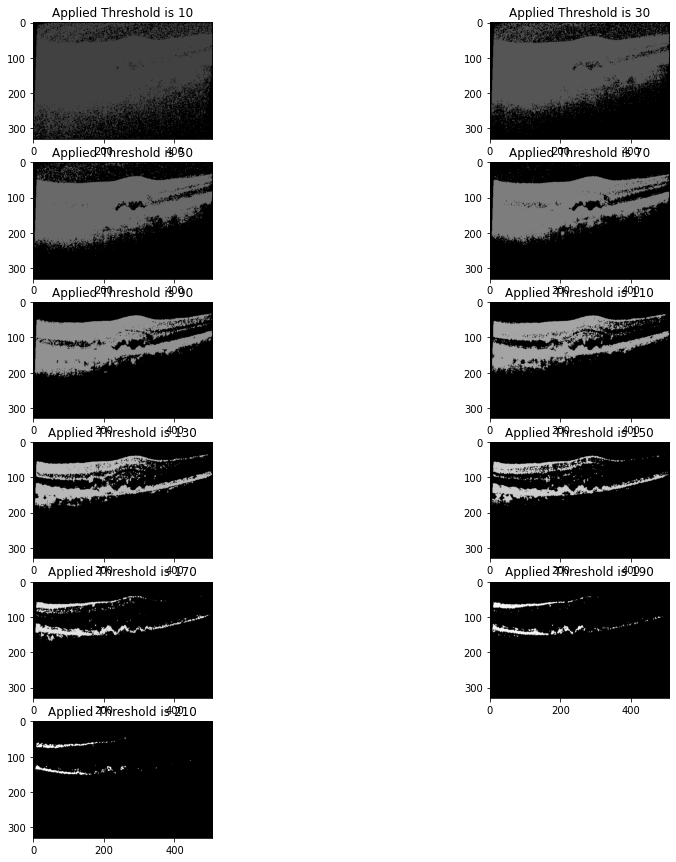

In [46]:
import os

MIN_ROW = 70
MAX_ROW = 400
RANGE_THRESHOLD = 145

os.chdir('/content/drive/My Drive/Colab Notebooks/AMD/Data/')
image_files = os.listdir()
img_name = image_files[0]

img = cv.imread(img_name)
img = img[MIN_ROW:MAX_ROW,500:,:]

count, th = 1, 10
fig = plt.figure(figsize=(15, 15))

while th <= 210:
  val = th + 55
  
  th_img, eroded, dilated = apply_threshold(img, th, val)
  #th_img = custom_threshold(img,th, val)
  #show_image(th_img, count, th, fig, plt)
  
  ax = fig.add_subplot(6, 2, count)
  plt.imshow(th_img)
  text_to_add = "Applied Threshold is "+ str(th)
  ax.title.set_text(text_to_add)
  
  count += 1
  th += 20
  #wh_range = return_white_range(th_img)
  #if wh_range > RANGE_THRESHOLD:      ## white pixels are more dispersed
   # print("The given image is abnormal")
  #else:
  #  print("The given image is Normal")
  #break
plt.show()



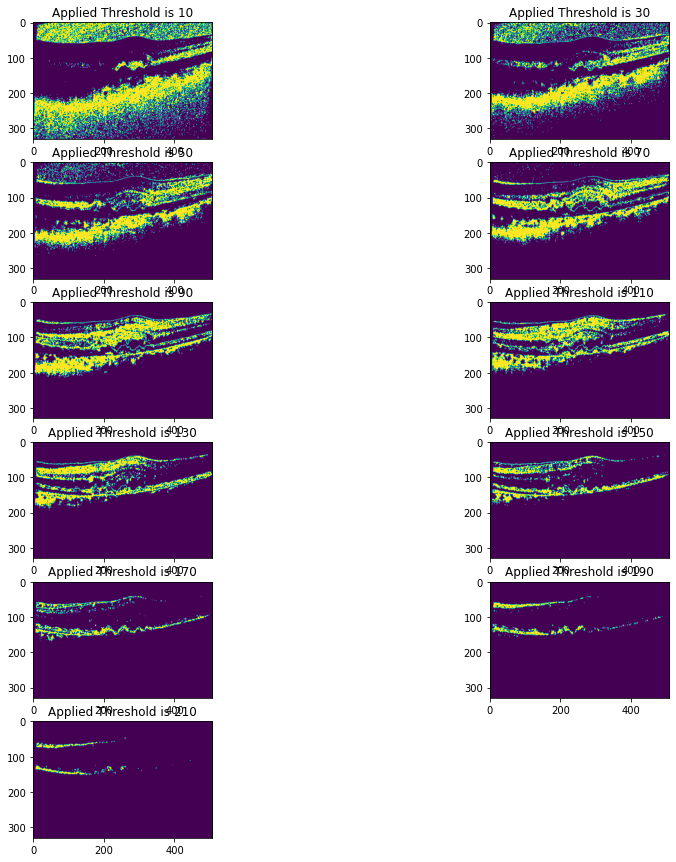

In [49]:
count, th = 1, 10
fig = plt.figure(figsize=(15, 15))

while th <= 210:
  val = th + 55
  
  th_img = custom_threshold(img,th, val)
  
  ax = fig.add_subplot(6, 2, count)
  plt.imshow(th_img)
  text_to_add = "Applied Threshold is "+ str(th)
  ax.title.set_text(text_to_add)
  
  count += 1
  th += 20
plt.show()

In [59]:
def find_bm_height(img):
  white_vals = []
  for x in range(img.shape[0]):
    for y in range(img.shape[1]):
      if img[x,y] == 255:
        white_vals.append(x)
  return max(white_vals)  

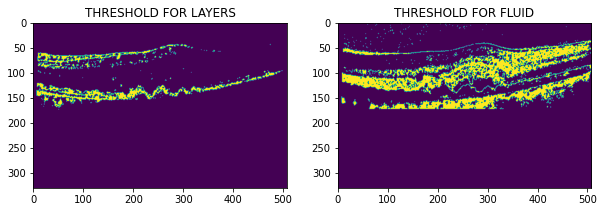

In [62]:
MIN_TH_BM, MAX_TH_BM = 170, 225
MIN_TH_FL, MAX_TH_FL = 70, 125

fig = plt.figure(figsize=(10, 10))
th_img1 = custom_threshold(img, MIN_TH_BM, MAX_TH_BM, 9999)
bm = find_bm_height(th_img1)
th_img2 = custom_threshold(img, MIN_TH_FL, MAX_TH_FL, bm)

ax = fig.add_subplot(1, 2, 1)
plt.imshow(th_img1)
text_to_add = "THRESHOLD FOR LAYERS"
ax.title.set_text(text_to_add)

ax = fig.add_subplot(1, 2, 2)
plt.imshow(th_img2)
text_to_add = "THRESHOLD FOR FLUID"
ax.title.set_text(text_to_add)

plt.show()
